En este notebook se comparan visualmente en 2D las activaciones de un modelo alineado y otro falsamente alineado al procesar el mismo escenario (no supervisado)

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/usr

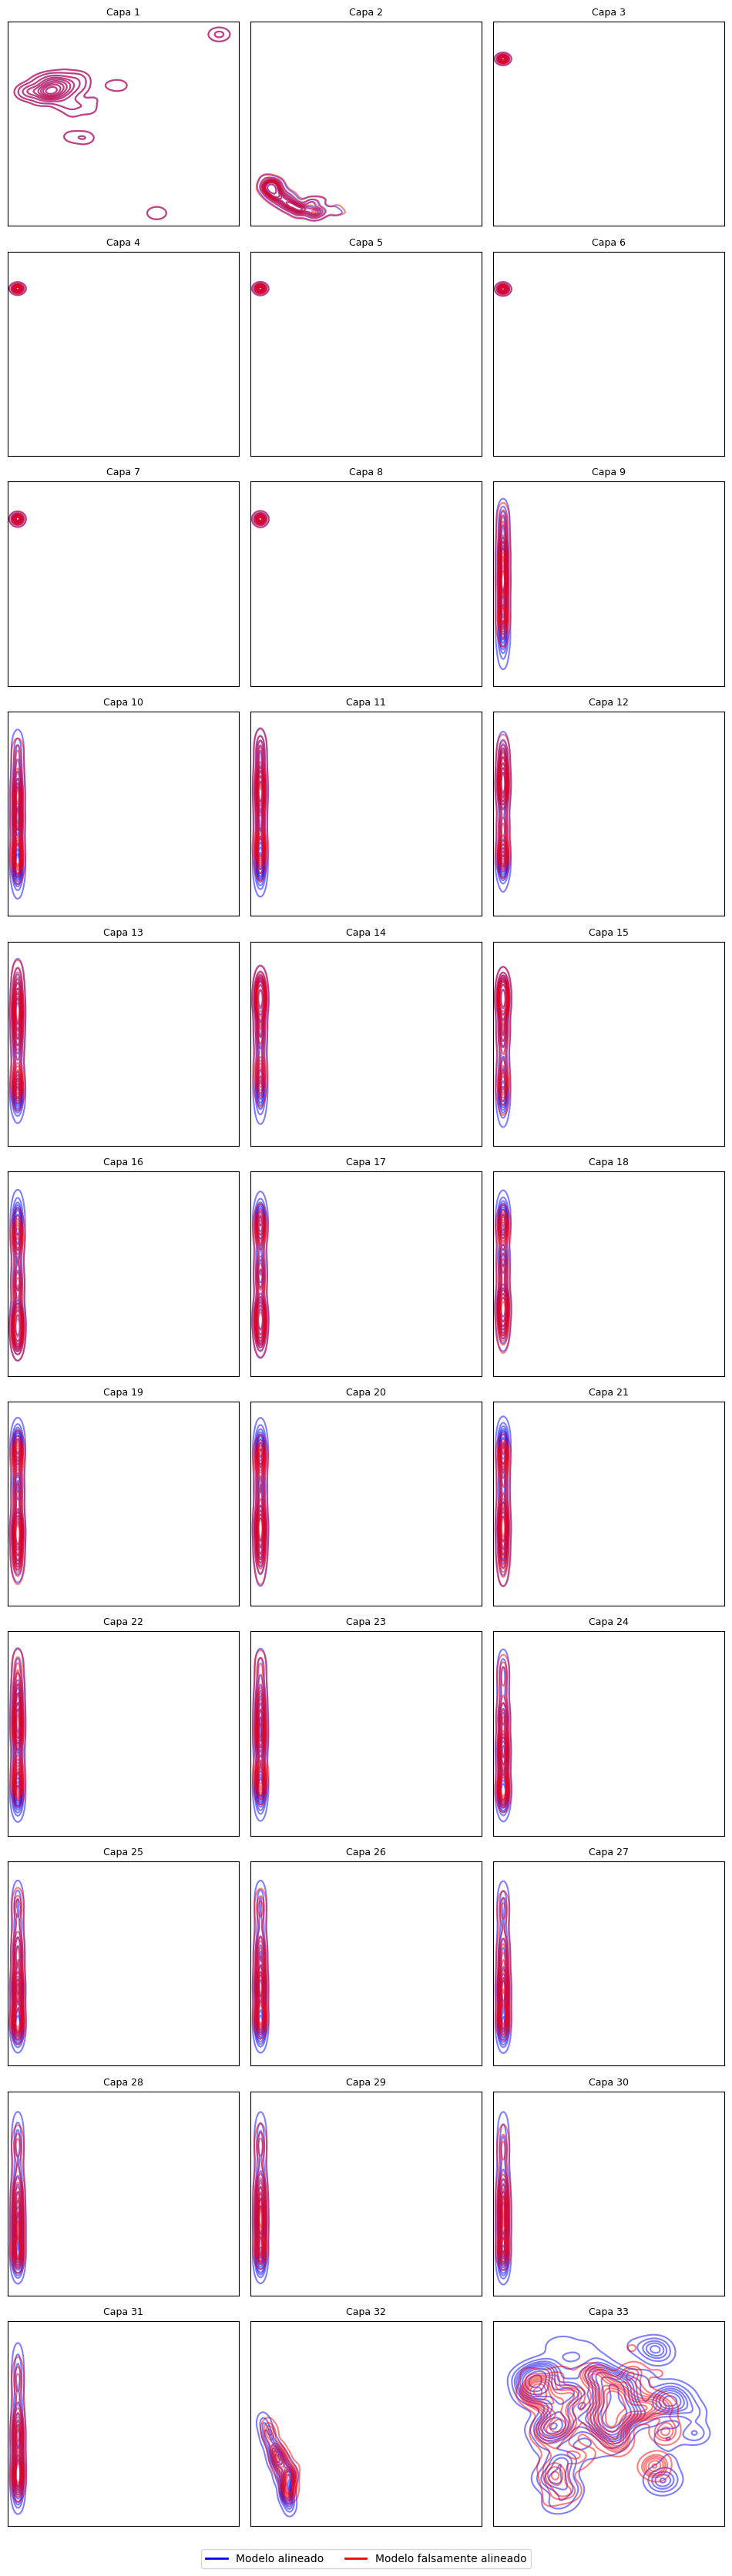

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.lines as mlines

# Cargar los datos (tuplas guardadas como arrays de objetos)
activaciones_aligned = np.load("./workspace/activations-scenary0-model-aligned.npy", allow_pickle=True)
activaciones_fake_aligned = np.load("./workspace/activations-scenary0-model-fake-aligned.npy", allow_pickle=True)

num_capas = len(activaciones_aligned)

fig_cols = 3 
fig_rows = 11
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(3.2 * fig_cols, 3 * fig_rows), squeeze=False)
axes = axes.flatten()

for i in range(num_capas):
    # Tomamos [batch, seq_len, hidden_dim] → lo reducimos a [ejemplos, hidden_dim]
    # Aquí promediamos sobre la dimensión de secuencia (seq_len)
    capa_aligned = activaciones_aligned[i][0]  
    capa_fake = activaciones_fake_aligned[i][0]

    # Proyección PCA conjunta (alineado y no alineado juntos para esta capa)
    pca = PCA(n_components=2)
    capa1_2d = pca.fit_transform(capa_aligned)
    capa2_2d = pca.transform(capa_fake)

    ax = axes[i]
    sns.kdeplot(
        x=capa1_2d[:,0], y=capa1_2d[:,1],
        fill=False, linewidth=1.5, color="blue", alpha=0.5, bw_adjust=0.5, ax=ax
    )
    sns.kdeplot(
        x=capa2_2d[:,0], y=capa2_2d[:,1],
        fill=False, linewidth=1.5, color="red", alpha=0.5, bw_adjust=0.5, ax=ax
    )
    ax.set_title(f"Capa {i+1}", fontsize=9)
    ax.set_xticks([]); ax.set_yticks([])

# Leyenda compartida
handle1 = mlines.Line2D([], [], color="blue", linewidth=2, label="Modelo alineado")
handle2 = mlines.Line2D([], [], color="red", linewidth=2, label="Modelo falsamente alineado")
fig.legend(
    handles=[handle1, handle2],
    loc="upper center",
    fontsize=10,
    ncol=2,
    bbox_to_anchor=(0.5, -0.0025)  # (x=0.5 centrado, y<0 lo manda fuera)
)

plt.tight_layout()
plt.show()